# Importance Sampling

We aim to compute the expected value of a function f(x) where $ x \sim p(x)$ (drawn from a distribution p).
$$E[f(x)] = \int f(x)p(x) dx \approx \frac{1}{n}\sum_{i} f(x_i)$$

We can introduce another distribution q and rewrite the expected value as follows:

$$E[f(x)] = \int f(x)p(x) dx = \int f(x)\frac{p(x)}{q(x)}q(x) dx \approx \frac{1}{n} \sum_{i} f(x_i)\frac{p(x_i)}{q(x_i)}$$

where $ x \sim q(x)$ and the ratio $\frac{p(x_i)}{q(x_i)}$ is the likelihood factor and known as importance weight. The general ratio $\frac{p(x)}{q(x)}$ is called importance function.

This estimator is proved to be unbiased, but suffer from large variance, especially when $ f(x_i) * p(x_i)$ goes to zero slower than $q(x_i)$

Inspired from [this repository](https://github.com/MJeremy2017/machine-learning-algorithm-implemention/blob/master/ImportanceSampling/ImportanceSampling.ipynb).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statistics import NormalDist
import matplotlib.patches as mpatches

Function f.

In [2]:
def f(x: float) -> float:
    return 1/(1 + np.exp(-x))

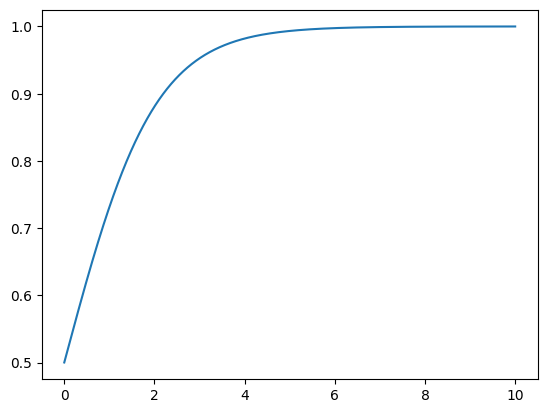

In [4]:
xx = np.arange(0.001,10,0.001)
yy = list(map(f,xx))

plt.plot(xx,yy);

Define a gaussian distribution p.

In [5]:
mean_p = 3
std_p = 1

p =  NormalDist(mu=mean_p, sigma=std_p)

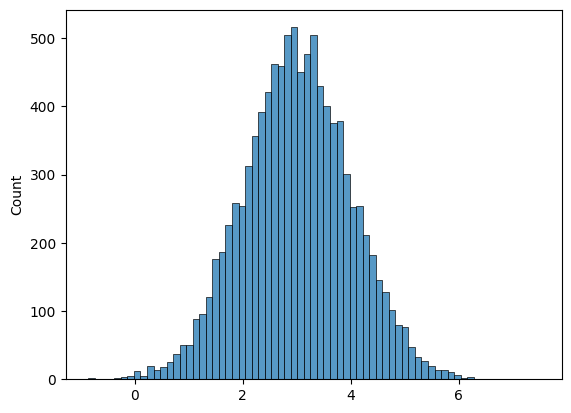

In [7]:
n_points = 10000
points_p = p.samples(n_points)
sns.histplot(points_p);

Compute f empirical mean sampling from p.

In [17]:
values = np.array(list(map(f,p.samples(n_points))))

mean_p_sampling = values.mean()
print(f"{mean_p_sampling=}")

mean_p_sampling=0.9301794623988466


Define q, another distribution. We'll still make it Gaussian for the sake of visualization.

In [14]:
mean_q = 5
std_q = 1
q =  NormalDist(mu=mean_q, sigma=std_q)

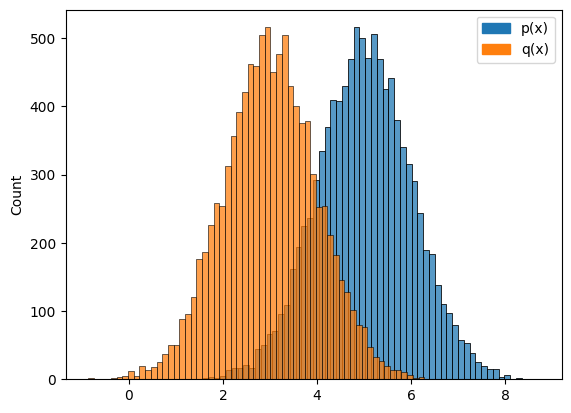

In [15]:
points_q = q.samples(n_points)

sns.histplot(points_q)
sns.histplot(points_p)

plt.legend(handles=list(map(lambda x: mpatches.Patch(color=x), sns.color_palette()[:2])), labels=['p(x)', 'q(x)'])

Compute mean by sampling from q and multiplying by importance weight.

In [19]:
pts = []

for i in range(n_points*100):

    sampled_xi = q.samples(1)[0]
    f_xi = f(sampled_xi)
    weighted = f_xi * p.pdf(sampled_xi)/q.pdf(sampled_xi)
    pts.append(weighted)


print(f"Mean sampling from Q={np.array(pts).mean()}")
print(f"Mean sampling from P={mean_p_sampling}")

Mean sampling from Q=0.9385917038893721
Mean sampling from P=0.9301794623988466
